In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drug_names = pd.read_csv('/content/drug_names.tsv', sep='\t',header=None, names=['STITCH_ID', 'Drug_Name'])
drug_names.columns=drug_names.columns.str.lower()

In [ ]:
drug_names.head()

,stitch_id,drug_name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate


In [ ]:
drug_names.isna().sum()

,0
stitch_id,0
drug_name,0


In [ ]:
indications=pd.read_csv('/content/meddra_all_indications.tsv', sep='\t',header=None,
                          names=['STITCH_ID', 'UMLS_ID', 'Detection_Method', 'Indication_Name', 'MedDRA_Type', 'UMLS_ID2', 'MedDRA_Indication_Name'])
indications.columns=indications.columns.str.lower()
indications.head()

,stitch_id,umls_id,detection_method,indication_name,meddra_type,umls_id2,meddra_indication_name
0,CID100000085,C0015544,text_mention,Failure to Thrive,LLT,C0015544,Failure to thrive
1,CID100000085,C0015544,text_mention,Failure to Thrive,PT,C0015544,Failure to thrive
2,CID100000085,C0020615,text_mention,Hypoglycemia,LLT,C0020615,Hypoglycaemia
3,CID100000085,C0020615,text_mention,Hypoglycemia,PT,C0020615,Hypoglycaemia
4,CID100000085,C0022661,NLP_indication,"Kidney Failure, Chronic",LLT,C0022661,Renal failure chronic


In [ ]:
indications.value_counts()

stitch_id     umls_id   detection_method  indication_name                   meddra_type  umls_id2  meddra_indication_name      
CID100000085  C0015544  text_mention      Failure to Thrive                 LLT          C0015544  Failure to thrive               1
CID100005514  C0259813  text_mention      Drop Attack                       PT           C0259813  Drop attacks                    1
CID100005525  C0018799  NLP_precondition  Heart Diseases                    PT           C0018799  Cardiac disorder                1
                                                                            LLT          C0018799  Cardiac disorder                1
              C0002994  text_mention      Angioedema                        PT           C0002994  Angioedema                      1
                                                                                                                                  ..
CID100003403  C0242339  NLP_indication    Dyslipidemias                     PT           C0242339  Dyslipidaemia                   1
                                                                            LLT          C0242339  Dyslipidaemia                   1
              C0085096  text_mention      Peripheral Vascular Diseases      PT           C0085096  Peripheral vascular disorder    1
                                                                            LLT          C0085096  Peripheral vascular disorder    1
CID171306834  C0856536  text_mention      Philadelphia chromosome positive  PT           C0476431  Chromosome analysis abnormal    1
Name: count, Length: 30794, dtype: int64

In [ ]:
indications.isna().sum()

,0
stitch_id,0
umls_id,0
detection_method,0
indication_name,0
meddra_type,41
umls_id2,41
meddra_indication_name,0


In [ ]:
merged_indications = pd.merge(indications, drug_names, on="stitch_id",how="left")
merged_indications.drop_duplicates(inplace=True)
merged_indications.dropna(inplace=True)
merged_indications.head()

,stitch_id,umls_id,detection_method,indication_name,meddra_type,umls_id2,meddra_indication_name,drug_name
0,CID100000085,C0015544,text_mention,Failure to Thrive,LLT,C0015544,Failure to thrive,carnitine
1,CID100000085,C0015544,text_mention,Failure to Thrive,PT,C0015544,Failure to thrive,carnitine
2,CID100000085,C0020615,text_mention,Hypoglycemia,LLT,C0020615,Hypoglycaemia,carnitine
3,CID100000085,C0020615,text_mention,Hypoglycemia,PT,C0020615,Hypoglycaemia,carnitine
4,CID100000085,C0022661,NLP_indication,"Kidney Failure, Chronic",LLT,C0022661,Renal failure chronic,carnitine


In [ ]:
side_effects=pd.read_csv('/content/meddra_all_se.tsv', sep='\t',header=None,
                        names=['STITCH_ID_flat','STITCH_ID_stereo', 'UMLS_ID', 'Concept_Type', 'MedDRA_UMLS_ID', 'Side_Effect_Name'])
side_effects.columns=side_effects.columns.str.lower()
side_effects.head()

,stitch_id_flat,stitch_id_stereo,umls_id,concept_type,meddra_umls_id,side_effect_name
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps
1,CID100000085,CID000010917,C0000729,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,LLT,C0000737,Abdominal pain
3,CID100000085,CID000010917,C0000737,PT,C0687713,Gastrointestinal pain
4,CID100000085,CID000010917,C0000737,PT,C0000737,Abdominal pain


In [ ]:
merged_se = pd.merge(side_effects, drug_names, left_on="stitch_id_flat",right_on='stitch_id',how="left")
merged_se.drop_duplicates(inplace=True)
merged_se.dropna(inplace=True)
merged_se.drop(columns=['stitch_id'],inplace=True)
merged_se.head()

,stitch_id_flat,stitch_id_stereo,umls_id,concept_type,meddra_umls_id,side_effect_name,drug_name
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,carnitine
1,CID100000085,CID000010917,C0000729,PT,C0000737,Abdominal pain,carnitine
2,CID100000085,CID000010917,C0000737,LLT,C0000737,Abdominal pain,carnitine
3,CID100000085,CID000010917,C0000737,PT,C0687713,Gastrointestinal pain,carnitine
4,CID100000085,CID000010917,C0000737,PT,C0000737,Abdominal pain,carnitine


In [ ]:
merged_se.shape

(308948, 7)

In [ ]:
print(f'Merged_indications size={merged_indications.shape}')
print(f'Merged_se size={merged_se.shape}')

Merged_indications size=(30476, 8)
Merged_se size=(308948, 7)


In [ ]:
df = pd.merge(merged_se, merged_indications, left_on='stitch_id_flat', right_on='stitch_id', how='inner', suffixes=('_se', '_ind'))
df.drop(columns=['stitch_id'], inplace=True)

df.head()

,stitch_id_flat,stitch_id_stereo,umls_id_se,concept_type,meddra_umls_id,side_effect_name,drug_name_se,umls_id_ind,detection_method,indication_name,meddra_type,umls_id2,meddra_indication_name,drug_name_ind
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,carnitine,C0015544,text_mention,Failure to Thrive,LLT,C0015544,Failure to thrive,carnitine
1,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,carnitine,C0015544,text_mention,Failure to Thrive,PT,C0015544,Failure to thrive,carnitine
2,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,carnitine,C0020615,text_mention,Hypoglycemia,LLT,C0020615,Hypoglycaemia,carnitine
3,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,carnitine,C0020615,text_mention,Hypoglycemia,PT,C0020615,Hypoglycaemia,carnitine
4,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,carnitine,C0022661,NLP_indication,"Kidney Failure, Chronic",LLT,C0022661,Renal failure chronic,carnitine


In [ ]:
df.shape

(10469014, 14)

In [ ]:
# Calculate the percentage of rows where 'umls_id_se' and 'meddra_umls_id' are the same
similarity_percentage = (df['umls_id_se'] == df['meddra_umls_id']).median() * 100

print(f"Percentage of exact matches: {similarity_percentage:.2f}%")

Percentage of exact matches: 100.00%


In [ ]:
df.drop(columns=[
    "stitch_id_stereo", "meddra_umls_id", "drug_name_se",
    "umls_id_ind", "detection_method", "indication_name"
], inplace=True)

# Rename `drug_name_ind` to just `drug_name` for clarity
df.rename(columns={"drug_name_ind": "drug_name"}, inplace=True)

df.rename(columns={"drugname_se": "drug_name"}, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.shape

(9312040, 8)

In [ ]:
df.rename(columns={'meddra_indication_name':'indication_name'},inplace=True)

In [ ]:
df.head()

,stitch_id_flat,umls_id_se,concept_type,side_effect_name,meddra_type,umls_id2,indication_name,drug_name
0,CID100000085,C0000729,LLT,Abdominal cramps,LLT,C0015544,Failure to thrive,carnitine
1,CID100000085,C0000729,LLT,Abdominal cramps,PT,C0015544,Failure to thrive,carnitine
2,CID100000085,C0000729,LLT,Abdominal cramps,LLT,C0020615,Hypoglycaemia,carnitine
3,CID100000085,C0000729,LLT,Abdominal cramps,PT,C0020615,Hypoglycaemia,carnitine
4,CID100000085,C0000729,LLT,Abdominal cramps,LLT,C0022661,Renal failure chronic,carnitine


In [ ]:
df.to_csv('merged_data.csv',index=False)

In [ ]:
df['drug_name'].value_counts()

,count
drug_name,
citalopram,193614
dexamethasone,180220
paroxetine,179014
fluoxetine,147898
triamcinolone,139930
...,...
mepyramine,12
hexachlorophene,12
sulfonamide,8


In [ ]:
df['indication_name'].value_counts()

,count
indication_name,
Renal impairment,98656
Infection,89045
Neoplasm malignant,76040
Hypertension,69070
Renal failure,59810
...,...
Steatorrhoea,8
Vitamin A deficiency,8
Blood zinc decreased,5


In [ ]:
duplicate_counts = df.duplicated(keep=False).sum()

print(f"Total number of duplicate rows: {duplicate_counts}")


duplicate_rows_counts = df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size().reset_index(name='count')

print("\nCounts of individual duplicated rows:")
print(duplicate_rows_counts)

Total number of duplicate rows: 0

Counts of individual duplicated rows:
Empty DataFrame
Columns: [stitch_id_flat, umls_id_se, concept_type, side_effect_name, meddra_type, umls_id2, indication_name, drug_name, count]
Index: []


# EDA

In [ ]:
df.describe(include='all')

,stitch_id_flat,umls_id_se,concept_type,side_effect_name,meddra_type,umls_id2,indication_name,drug_name
count,9312040,9312040,9312040,9312040,9312040,9312040,9312040,9312040
unique,1360,5752,2,6007,2,3043,3043,1284
top,CID100002771,C0231218,PT,Dizziness,PT,C1565489,Renal impairment,citalopram
freq,193614,75995,4915754,66485,4710469,98656,98656,193614


In [ ]:
pair_counts=df.groupby(['side_effect_name','indication_name']).size().reset_index(name='count')
pair_counts=pair_counts.sort_values(by='count',ascending=False)
pair_counts.head(30)

,side_effect_name,indication_name,count
1036479,Rash,Infection,760
841857,Nausea,Infection,742
354050,Dizziness,Hypertension,731
336952,Diarrhoea,Infection,730
1300228,Vomiting,Infection,704
354139,Dizziness,Infection,698
355015,Dizziness,Renal impairment,686
551999,Headache,Infection,638
7600,Abdominal pain,Infection,622
1012232,Pruritus,Infection,614


In [ ]:
# Find all drugs where the same drug name appears with a strange (side effect, indication) pair
drug_mismatch = df.groupby(["drug_name", "side_effect_name", "indication_name"]).size().reset_index(name="count")
drug_mismatch=drug_mismatch.sort_values(by='count',ascending=False)

print(drug_mismatch.head(30))


           drug_name  side_effect_name                    indication_name  \
1385140  fluticasone  Nasal discomfort                   Seasonal allergy   
1385137  fluticasone  Nasal discomfort                 Rhinitis perennial   
1385136  fluticasone  Nasal discomfort                  Rhinitis allergic   
714428   clindamycin    Abdominal pain        Respiratory tract infection   
2643035       sodium         Dizziness                           Headache   
714446   clindamycin    Abdominal pain                     Vulvovaginitis   
714441   clindamycin    Abdominal pain                  Vaginal discharge   
714382   clindamycin    Abdominal pain                  Abdominal abscess   
714383   clindamycin    Abdominal pain                Abdominal infection   
714395   clindamycin    Abdominal pain                          Diarrhoea   
714439   clindamycin    Abdominal pain               Tubo-ovarian abscess   
714435   clindamycin    Abdominal pain              Soft tissue infection   

In [ ]:
# Count unique side effects and indications per drug
drug_check = df.groupby("drug_name").agg(
    num_side_effects=("side_effect_name", "nunique"),
    num_indications=("indication_name", "nunique")
)

# Sort by the highest number of SEs and indications
drug_check = drug_check.sort_values(by=["num_side_effects", "num_indications"], ascending=False)

# Display drugs with unusually high numbers
print(drug_check.head(30))


               num_side_effects  num_indications
drug_name                                       
pregabalin                  839               12
aripiprazole                827               23
citalopram                  823               74
ropinirole                  682               18
risperidone                 666               46
pramipexole                 648                3
tramadol                    625                8
paroxetine                  624               99
bortezomib                  618                9
venlafaxine                 584               66
tacrolimus                  568               47
fluoxetine                  549               92
K779                        537               53
topiramate                  535               31
fentanyl                    521               47
gabapentin                  521               25
bupropion                   520               30
doxorubicin                 517               80
ciprofloxacin       

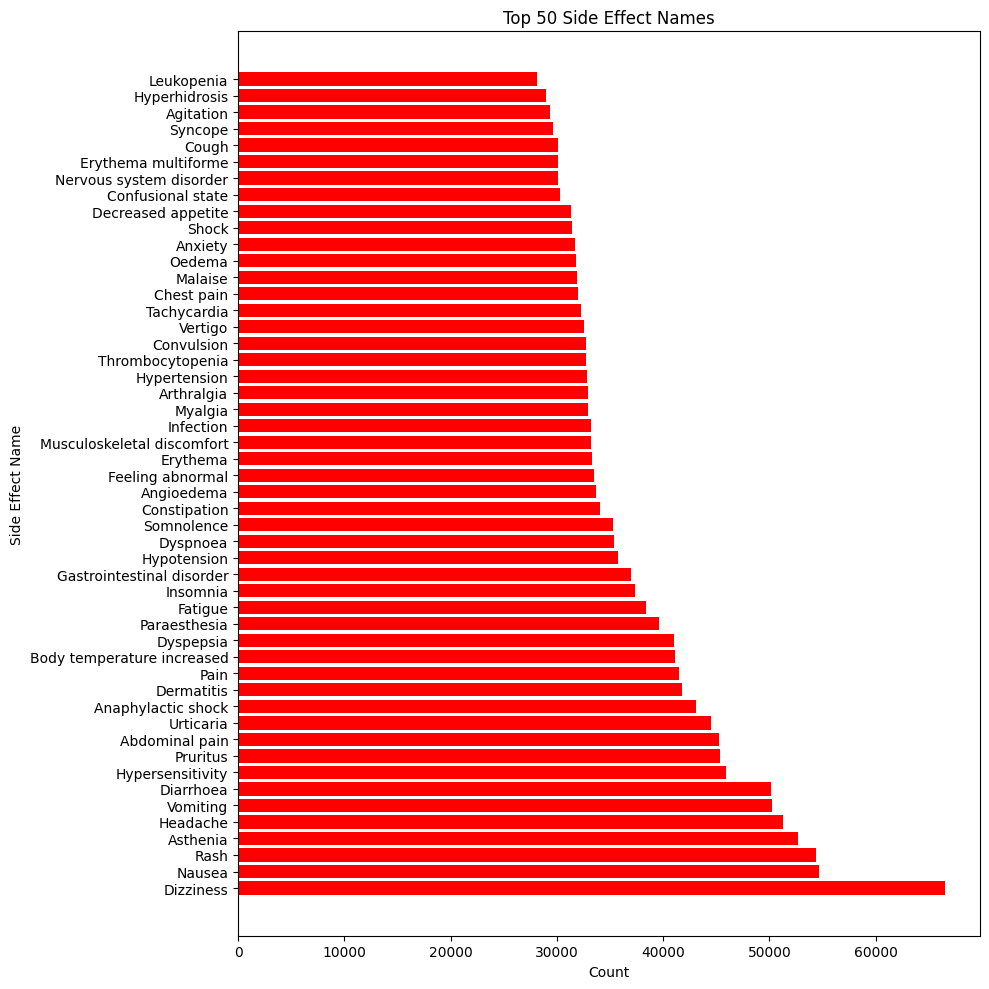

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(df['side_effect_name'].value_counts().sort_values(ascending=False)[:50].index, df['side_effect_name'].value_counts().sort_values(ascending=False)[:50].values
       ,color='red', )
plt.xlabel('Count')
plt.ylabel('Side Effect Name')
plt.title('Top 50 Side Effect Names')
plt.tight_layout()
plt.show()

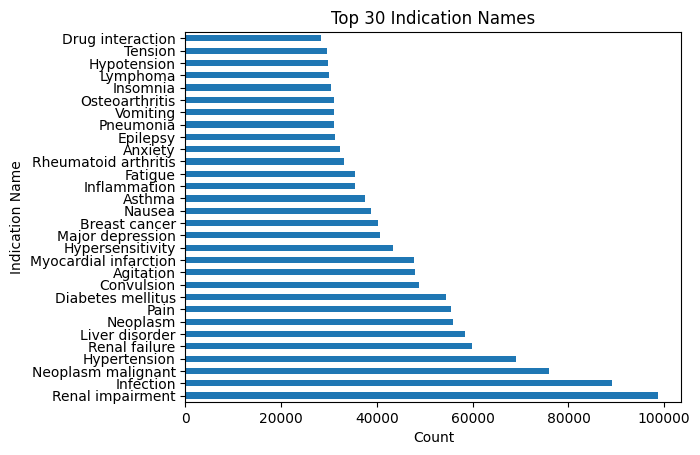

<Figure size 1000x1000 with 0 Axes>

In [ ]:
df['indication_name'].value_counts().head(30).plot(kind='barh',xlabel='Count',
                                               ylabel='Indication Name',title='Top 30 Indication Names')
plt.figure(figsize=(10,10))
plt.show()


drug_name
pregabalin      839
aripiprazole    827
citalopram      823
ropinirole      682
risperidone     666
pramipexole     648
tramadol        625
paroxetine      624
bortezomib      618
venlafaxine     584
Name: side_effect_name, dtype: int64


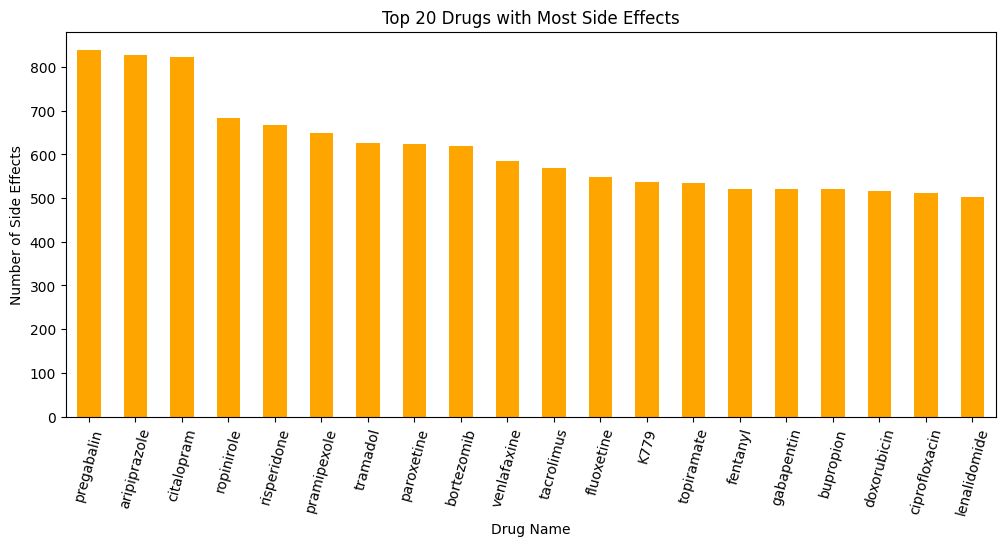

Drugs with lease side effects: drug_name
zinc             3
crotamiton       3
ZnCl2            3
pertechnetate    2
sulfonamide      2
DMSO             2
retinol          2
selenium         2
mepyramine       1
triclosan        1
Name: side_effect_name, dtype: int64


In [ ]:
# Count number of side effects per drug
se_per_drug = df.groupby("drug_name")["side_effect_name"].nunique().sort_values(ascending=False)

# Top 10 drugs with most SEs
print(se_per_drug.head(10))

# Visualizing
se_per_drug.head(20).plot(kind='bar', figsize=(12,5), color='orange')
plt.title("Top 20 Drugs with Most Side Effects")
plt.ylabel("Number of Side Effects")
plt.xlabel("Drug Name")
plt.xticks(rotation=75)
plt.show()

print(f'Drugs with lease side effects: {se_per_drug.tail(10)}')




drug_name
dexamethasone         199
prednisolone          147
methylprednisolone    147
prednisone            140
cortisol              140
demethyl              113
sodium                112
triamcinolone         104
progesterone          100
paroxetine             99
Name: indication_name, dtype: int64


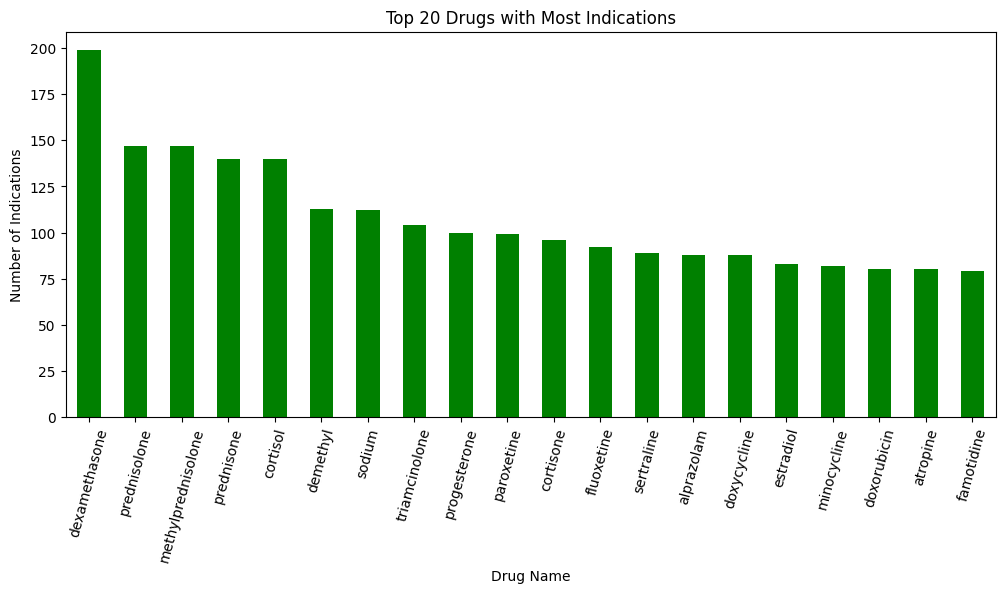

In [ ]:
# Count number of indications per drug
ind_per_drug = df.groupby("drug_name")["indication_name"].nunique().sort_values(ascending=False)

# Top 10 drugs with most indications
print(ind_per_drug.head(10))

# Visualizing
ind_per_drug.head(20).plot(kind='bar', figsize=(12,5), color='green')
plt.title("Top 20 Drugs with Most Indications")
plt.ylabel("Number of Indications")
plt.xlabel("Drug Name")
plt.xticks(rotation=75)
plt.show()


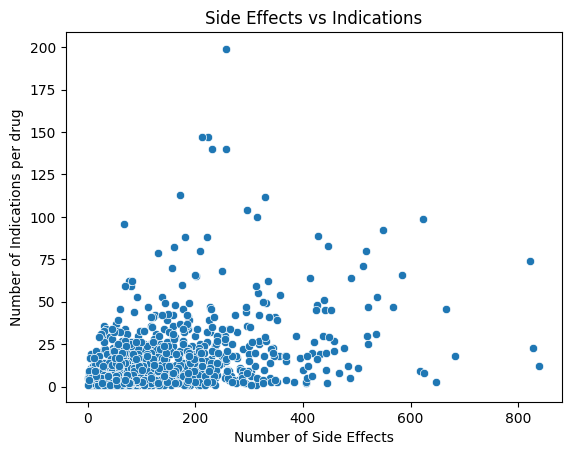

In [ ]:
df_indic=df.groupby('drug_name').agg(side_effect_name=('side_effect_name','nunique'),
                                     indication_name=('indication_name','nunique'))

sns.scatterplot(data=df_indic,x='side_effect_name',y='indication_name')
plt.title('Side Effects vs Indications')
plt.xlabel('Number of Side Effects')
plt.ylabel('Number of Indications per drug')
plt.show()